In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

from sklearn.metrics import mutual_info_score

pd.set_option('max_columns', None)

In [2]:
train_data = pd.read_csv('../../data/raw/training.csv',)
test_data = pd.read_csv('../../data/raw/test.csv',)

In [3]:
train_data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [4]:
train_data.sample(5)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
83503,TransactionId_360,BatchId_67291,AccountId_4841,SubscriptionId_3829,CustomerId_2531,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-02T17:59:00Z,2,0
38313,TransactionId_39011,BatchId_14769,AccountId_4184,SubscriptionId_998,CustomerId_4636,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2018-12-23T14:46:16Z,2,0
38686,TransactionId_127345,BatchId_13904,AccountId_10,SubscriptionId_4346,CustomerId_790,UGX,256,ProviderId_4,ProductId_3,airtime,ChannelId_5,-3000.0,3000,2018-12-24T06:32:14Z,4,0
37876,TransactionId_10500,BatchId_113565,AccountId_2591,SubscriptionId_4186,CustomerId_3008,UGX,256,ProviderId_6,ProductId_7,tv,ChannelId_3,60000.0,60000,2018-12-23T07:41:53Z,2,0
57402,TransactionId_133328,BatchId_106780,AccountId_2656,SubscriptionId_2912,CustomerId_3075,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,100000.0,100000,2019-01-11T14:52:12Z,4,0


In [5]:
train_data.tail()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0
95661,TransactionId_35670,BatchId_29317,AccountId_4841,SubscriptionId_3829,CustomerId_1709,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:01:28Z,2,0


In [6]:
train_data.shape

(95662, 16)

In [7]:
train_data.dtypes

TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

In [8]:
def transform(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_')

    string_columns = list(df.dtypes[df.dtypes == 'object'].index)

    for col in string_columns:
        df[col] = df[col].str.lower().str.replace(' ', '_')

    return df



train_data = transform(train_data)
test_data = transform(test_data)

In [9]:
cat_features =  train_data.select_dtypes(include=['object']).columns.to_list()
cat_features

['transactionid',
 'batchid',
 'accountid',
 'subscriptionid',
 'customerid',
 'currencycode',
 'providerid',
 'productid',
 'productcategory',
 'channelid',
 'transactionstarttime']

In [10]:
num_features = train_data.select_dtypes(exclude=['object', 'datetime64']).columns.to_list()
num_features

['countrycode', 'amount', 'value', 'pricingstrategy', 'fraudresult']

In [11]:
train_data[num_features].describe()

,countrycode,amount,value,pricingstrategy,fraudresult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [12]:
train_data[cat_features].describe().T

,count,unique,top,freq
transactionid,95662,95662,transactionid_76871,1
batchid,95662,94809,batchid_67019,28
accountid,95662,3633,accountid_4841,30893
subscriptionid,95662,3627,subscriptionid_3829,32630
customerid,95662,3742,customerid_7343,4091
currencycode,95662,1,ugx,95662
providerid,95662,6,providerid_4,38189
productid,95662,23,productid_6,32635
productcategory,95662,9,financial_services,45405
channelid,95662,4,channelid_3,56935


In [13]:
train_data[cat_features].nunique()

transactionid           95662
batchid                 94809
accountid                3633
subscriptionid           3627
customerid               3742
currencycode                1
providerid                  6
productid                  23
productcategory             9
channelid                   4
transactionstarttime    94556
dtype: int64

In [14]:
df = train_data.isna().sum()
df = df.reset_index()
df.columns = ['features', 'missing_counts']

missing_percent = round((df['missing_counts'] / train_data.shape[0]) * 100, 1)
df['missing_percent'] = missing_percent
df

,features,missing_counts,missing_percent
0,transactionid,0,0.0
1,batchid,0,0.0
2,accountid,0,0.0
3,subscriptionid,0,0.0
4,customerid,0,0.0
5,currencycode,0,0.0
6,countrycode,0,0.0
7,providerid,0,0.0
8,productid,0,0.0
9,productcategory,0,0.0


In [15]:
train_data['transactionstarttime'] = pd.to_datetime(train_data['transactionstarttime'])
test_data['transactionstarttime'] = pd.to_datetime(test_data['transactionstarttime'])

<Figure size 504x504 with 0 Axes>

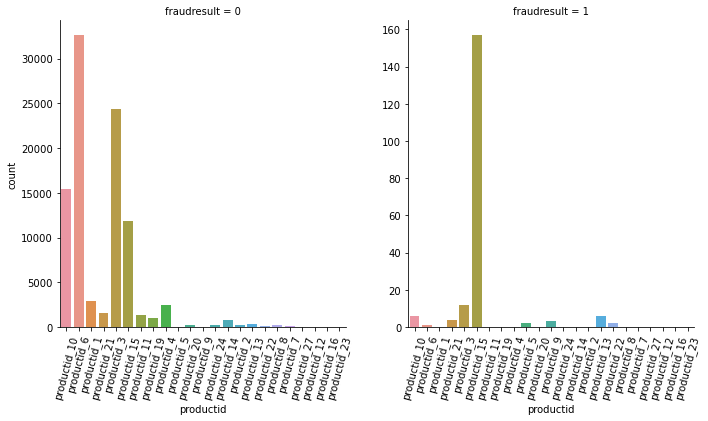

<Figure size 504x504 with 0 Axes>

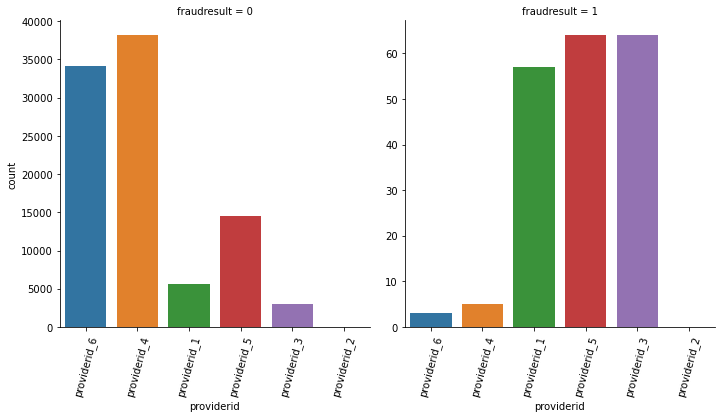

<Figure size 504x504 with 0 Axes>

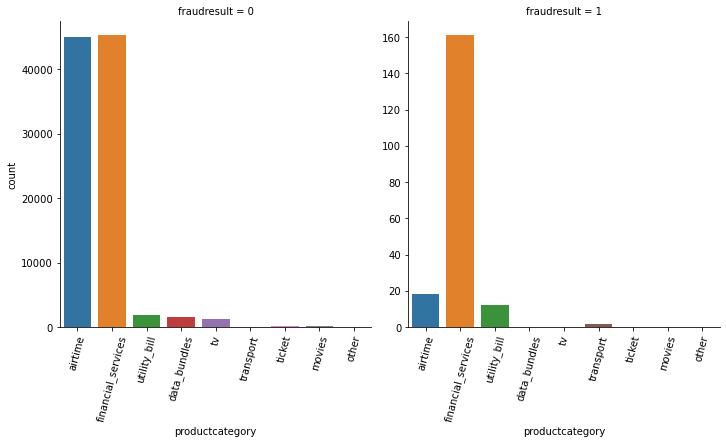

<Figure size 504x504 with 0 Axes>

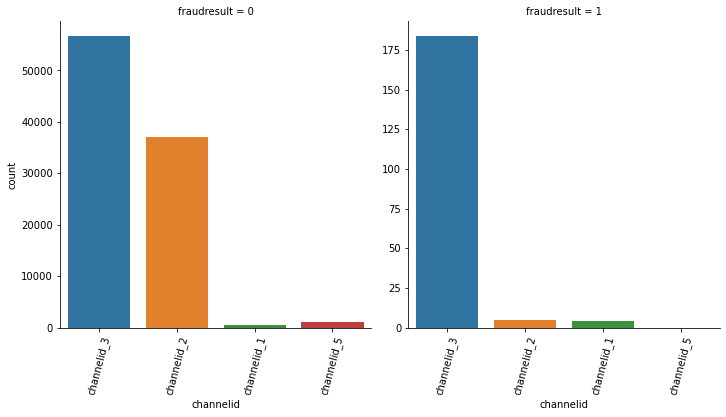

In [16]:
cols = ['productid', 'providerid', 'productcategory', 'channelid']


for col in cols:
    plt.figure(figsize=(7,7))
    g = sns.catplot(x=col, col='fraudresult', data=train_data,
                kind="count", sharey=False)
    g.set_xticklabels(rotation = '75')
    plt.show()

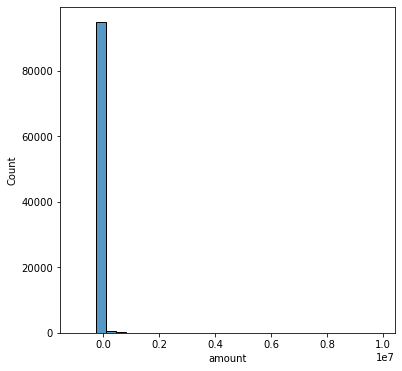

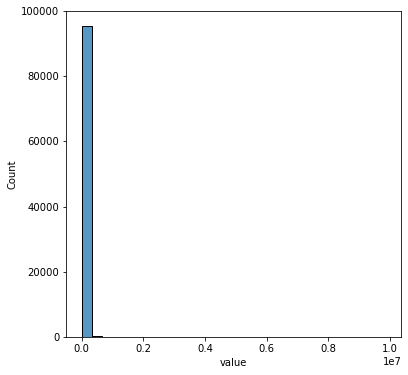

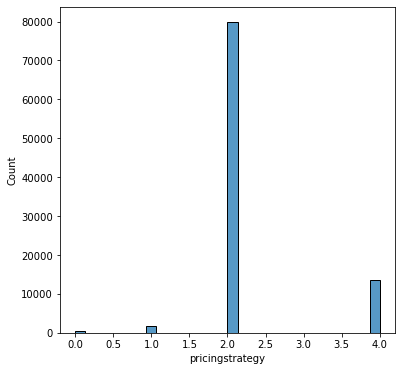

In [17]:
num_cols = ['amount', 'value', 'pricingstrategy']

for col in num_cols:
    plt.figure(figsize=(6,6))
    g = sns.histplot(data = train_data, x = col, 
                    bins = 30, palette='ocean')
    #plt.xticks(rotation = '90')
    plt.show

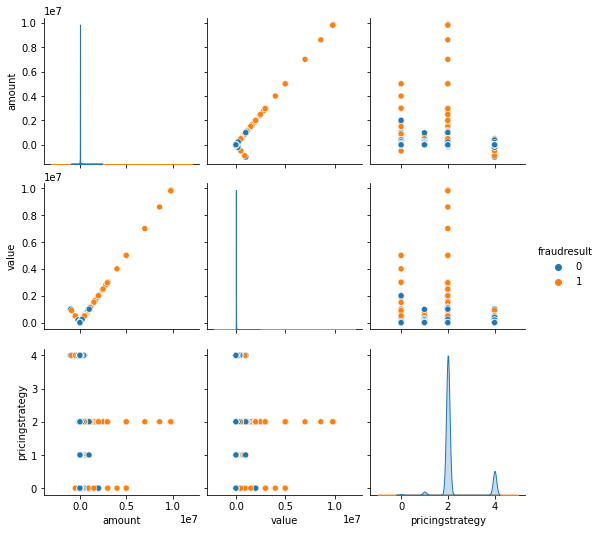

In [18]:
sns.pairplot(train_data[num_cols + ["fraudresult"]], hue="fraudresult", height=2.5)

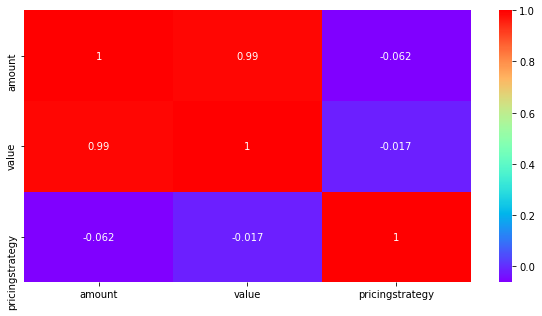

In [27]:
plt.figure(figsize = (10,5))
sns.heatmap(train_data[num_cols].corr(), annot = True, cmap="rainbow")
plt.show()

In [19]:
global_mean = train_data.fraudresult.mean()
round(global_mean, 4)

0.002

In [20]:
for col in cols:
    df_group = train_data.groupby(by=col).fraudresult.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
productid,,,
productid_1,0.000000,-0.002018,0.000000
productid_10,0.000390,-0.001628,0.193314
productid_11,0.000000,-0.002018,0.000000
productid_12,0.000000,-0.002018,0.000000
productid_13,0.020270,0.018253,10.047122
productid_14,0.000000,-0.002018,0.000000
productid_15,0.013123,0.011105,6.504372
productid_16,0.000000,-0.002018,0.000000
productid_19,0.000000,-0.002018,0.000000


,mean,diff,risk
providerid,,,
providerid_1,0.010101,0.008083,5.006647
providerid_2,0.000000,-0.002018,0.000000
providerid_3,0.020752,0.018735,10.286029
providerid_4,0.000131,-0.001887,0.064895
providerid_5,0.004401,0.002384,2.181413
providerid_6,0.000088,-0.001930,0.043497


,mean,diff,risk
productcategory,,,
airtime,0.000400,-0.001618,0.198144
data_bundles,0.000000,-0.002018,0.000000
financial_services,0.003546,0.001528,1.757536
movies,0.000000,-0.002018,0.000000
other,0.000000,-0.002018,0.000000
ticket,0.000000,-0.002018,0.000000
transport,0.080000,0.077982,39.652642
tv,0.000000,-0.002018,0.000000
utility_bill,0.006250,0.004232,3.097863


,mean,diff,risk
channelid,,,
channelid_1,0.007435,0.005417,3.685190
channelid_2,0.000135,-0.001883,0.066727
channelid_3,0.003232,0.001214,1.601846
channelid_5,0.000000,-0.002018,0.000000


In [21]:
def calculate_mi(series):
    return mutual_info_score(series, train_data.fraudresult)

df_mi = train_data[cols].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi)

,MI
productid,0.003182
providerid,0.002809
productcategory,0.000866
channelid,0.000821


In [22]:
train_data[num_cols].corrwith(train_data.fraudresult).to_frame('correlation')

,correlation
amount,0.557370
value,0.566739
pricingstrategy,-0.033821


In [23]:
def extract_dates(data=None, date_cols=None, subset=None, drop=True):
    df = data
    for date_col in date_cols:
        #Convert date feature to Pandas DateTime
        df[date_col ]= pd.to_datetime(df[date_col])

        #specify columns to return
        dict_dates = {  "dow":  df[date_col].dt.weekday,
                        "dom": df[date_col].dt.day,
                        "doy":   df[date_col].dt.dayofyear,
                        "hr": df[date_col].dt.hour,
                        "min":   df[date_col].dt.minute,
                        "is_wkd":  df[date_col].apply(lambda x : 1 if x  in [5,6] else 0 ),
                        "wkoyr": df[date_col].dt.isocalendar().week,
                        "mth": df[date_col].dt.month,
                        "qtr":  df[date_col].dt.quarter,
                        "yr": df[date_col].dt.year
                    } 

        if subset is None:
            #return all features
            subset = ['dow', 'dom', 'doy', 'hr', 'min', 'is_wkd', 'wkoyr', 'mth', 'qtr', 'yr']
            for date_ft in subset:
                df[date_col + '_' + date_ft] = dict_dates[date_ft]
        else:
            #Return only sepcified date features
            for date_ft in subset:
                df[date_col + '_' + date_ft] = dict_dates[date_ft]
                
    #Drops original time columns from the dataset
    if drop:
        df.drop(date_cols, axis=1, inplace=True)

    return df

In [24]:
train_data = extract_dates(data = train_data, date_cols = ['transactionstarttime'])
test_data = extract_dates(data = test_data, date_cols = ['transactionstarttime'])

In [25]:
fr = train_data.pop('fraudresult')
train_data['fraudresult'] = fr

train_data.head()

,transactionid,batchid,accountid,subscriptionid,customerid,currencycode,countrycode,providerid,productid,productcategory,channelid,amount,value,pricingstrategy,transactionstarttime_dow,transactionstarttime_dom,transactionstarttime_doy,transactionstarttime_hr,transactionstarttime_min,transactionstarttime_is_wkd,transactionstarttime_wkoyr,transactionstarttime_mth,transactionstarttime_qtr,transactionstarttime_yr,fraudresult
0,transactionid_76871,batchid_36123,accountid_3957,subscriptionid_887,customerid_4406,ugx,256,providerid_6,productid_10,airtime,channelid_3,1000.0,1000,2,3,15,319,2,18,0,46,11,4,2018,0
1,transactionid_73770,batchid_15642,accountid_4841,subscriptionid_3829,customerid_4406,ugx,256,providerid_4,productid_6,financial_services,channelid_2,-20.0,20,2,3,15,319,2,19,0,46,11,4,2018,0
2,transactionid_26203,batchid_53941,accountid_4229,subscriptionid_222,customerid_4683,ugx,256,providerid_6,productid_1,airtime,channelid_3,500.0,500,2,3,15,319,2,44,0,46,11,4,2018,0
3,transactionid_380,batchid_102363,accountid_648,subscriptionid_2185,customerid_988,ugx,256,providerid_1,productid_21,utility_bill,channelid_3,20000.0,21800,2,3,15,319,3,32,0,46,11,4,2018,0
4,transactionid_28195,batchid_38780,accountid_4841,subscriptionid_3829,customerid_988,ugx,256,providerid_4,productid_6,financial_services,channelid_2,-644.0,644,2,3,15,319,3,34,0,46,11,4,2018,0


In [26]:
train_data.to_csv('../../data/processed/training.csv', index=False)
test_data.to_csv('../../data/processed/test.csv', index=False)